In [1]:
from IPython.display import display, Math, Latex

# Day 1: Introduction and easy example

# What is AI? What is machine learning?

## Are they the same thing? What is the Venn diagram?

###  

<img src="imgs/AI-vs-ML-vs-Deep-Learning.png" style="height:300px" class="center" alt="AI vs ML vs DL"/>

# Machine Learning

"Machine learning (ML) is an umbrella term for solving problems for which development of algorithms by human programmers would be cost-prohibitive, and instead the problems are solved by helping machines 'discover' their 'own' algorithms, without needing to be explicitly told what to do by any human-developed algorithms."

&mdash; Wikipedia

Classic uses:

* Regression<br>
   &emsp; $f(\vec{x})$ = ?<br>
* Classification<br>
   &emsp; What category of thing is this?<br>
* Generation<br>
   &emsp; Make something new<br>
* Simulation<br>
   &emsp; Take actions towards some goal<br>

Types of Learning:
* Supervised<br>
    &emsp; You have all the answers<br>
<img src="imgs/supervised.webp" style="height:200px" class="center" alt="supervised"/><br>
* Unsupervised<br>
    &emsp; You do not have any answers<br>
<img src="imgs/unsupervised.webp" style="height:200px" class="center" alt="unsupervised"/><br>
* Semi-Supervised<br>
    &emsp; You have some of the answers<br>
<img src="imgs/semisupervised.webp" style="height:300px" class="center" alt="semisupervised"/><br>
* Reinforcement<br>
    &emsp; Reward feedback loop<br>
<img src="imgs/reinforcement.webp" style="height:300px" class="center" alt="reinforcement"/>

Self-supervised learning is becomming important and useful (e.g., BERT), but it's really complicated, and we won't explore it here. It's somewhat similar to unsupervised learning in that it doesn't require all labels and instead focuses on learning patterns within the data.

## How does it work?

Given a set of data and an objective, optimize the parameters of a model to minimize some loss function. For example, regression will often use mean-squared error (MSE) as the loss function. 

There is an entire subfield behind the optimizers that are used. The traditional method was simple stochastic gradient descent (SGD). All this does is calculate the derivative of the loss function with respect to the parameters and update them accordingly.

While SGD is useful and often adequate, it suffers from several significant issues. Most importantly, SGD optimizers can easily get stuck in a local minimum (we want to find _the_ global minimum) and they suffer significantly when the gradients in different directions differ substantially ("pathological curvature"). There are several methods with which we can address this: momentum addresses the former and adaptive gradient scaling addresses the latter.

Momentum is exactly what it sounds like. The optimizer remembers previous gradients and can continue "uphill" even when the gradient is going down. This allows it to get over the humps of local minima more easily than SGD.

<img src="imgs/momentum.png" style="height:300px" class="center" alt="momentum"/>

Adaptive gradient/RMSProp scales the update of the the parameters by the magnitude of the gradient. This allows all directions to converge at more or less the same rate, which encourages the global minimum to be reached.
<table>
    <tr>
        <td><img src="imgs/patho_curve.png" alt="patho_curve" width="80%"></td>
        <td><img src="imgs/patho_zoom.png" alt="patho_zoom" width="80%"></td>
    </tr>
</table>


Putting these all together, we come up with a different combination of possible optimizers: momentum and/or gradient scaling. "Adam" is the most popular optimizer as it includes both (Adaptive gradient with Momentum = Adam).

<img src="imgs/optimizer_comparison.gif" style="height:600px" class="center" alt="optimizers"/>

## Workflow

Step 1: identify problem<br>
Step 2: find data<br>
Step 3: prepare/wrangle/modify data<br>
Step 4 (usually): Tend to split data into 3 sets for training, validation (during training), and testing (after training). This helps prevent overfitting and improve generality<br>
Step 5: create model<br>
Step 6: train model<br>
Step 7: assess model performance on withheld data (test set)<br>
Step 8 (encouraged): adjust model hyperparameters and redo

# Let's try some

In [66]:
## import necessary packages
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, LogNorm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colormaps as mplcm
from matplotlib import rc as mplrc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import numpy as np

import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import neighbors
from sklearn.cluster import KMeans, OPTICS, DBSCAN, AgglomerativeClustering

## Misc parameters

In [4]:
## plotting a prameters
scale_factor = 1.5

labels = 20 * scale_factor
ticks = 14 * scale_factor
# ticks = 10 * scale_factor
legends = 14 * scale_factor
text = 14 * scale_factor
titles = 22 * scale_factor
lw = 3 * scale_factor
ps = 200 * scale_factor
cmap = 'magma'
category_cmap = "Set2"

colors = ['firebrick', 'steelblue', 'darkorange', 'darkviolet', 'cyan', 'magenta', 'darkgreen', 'deeppink']
markers = ['x', 'o', '+', '>', '*', 'D', '4']
linestyles = ['-', '--', ':', '-.']

## Load data

In [5]:
## We're going to use the iris dataset. This is a simple dataset for basic classification.
data = datasets.load_iris()

The iris dataset contains 150 different flowers of 3 different species of flower. Each flower is described by 4 features of the flower: sepal length, sepal width, petal length, and petal width.

<img src="imgs/iris.png" style="height:300px" class="center" alt="iris"/>

It's stored as a dictionary. "data" contains the data as a 150 x 4 numpy array. "target" contains the classes labeled 0-2. "feature_names" and "target_names" have the names of the features and targets, respectively.

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# split into features and targets
X = data["data"].copy()
y = data["target"].copy()

In [10]:
num_classes = len(data["target_names"])

In [67]:
X.shape, y.shape

((150, 4), (150,))

In [69]:
X[:2], y[:2]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]),
 array([0, 0]))

## Plot some data

This helps us understand the structure of the data and visualize any relationships that might exist and can be exploited.

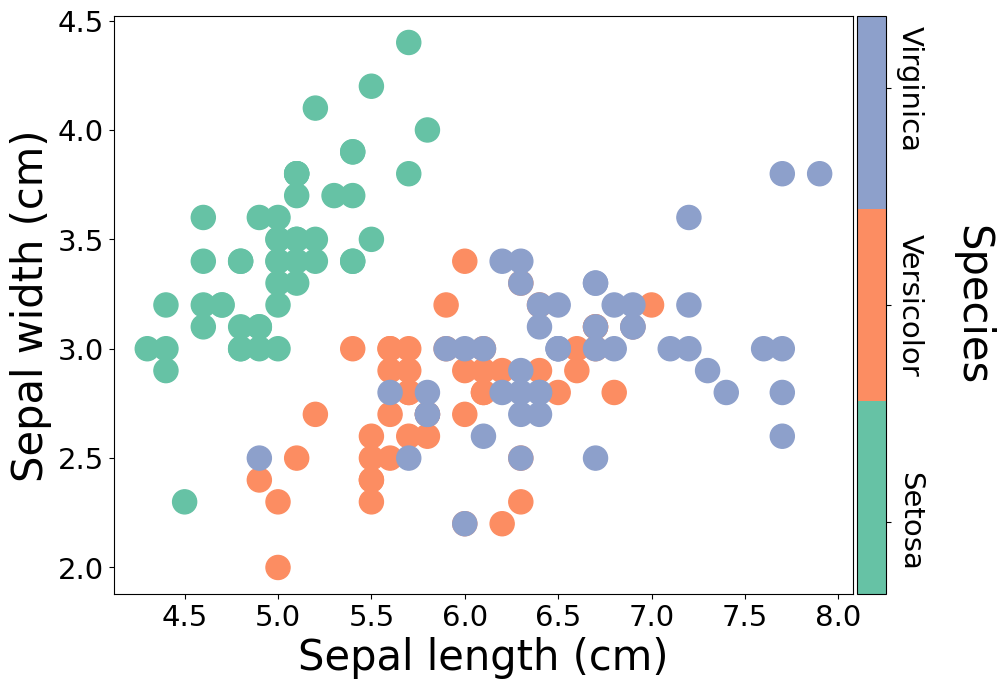

In [11]:
plt.figure(figsize=(10., 7.5))

this_cmap = category_cmap
this_cmap = mplcm.get_cmap(this_cmap).colors
this_cmap = ListedColormap(this_cmap[:num_classes])

# plot sepal length and width. Color by class.
plt.scatter(X[:, 0], X[:, 1], c=y, s=ps, marker="o", cmap=this_cmap)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.set_ylabel("Species", rotation=270, fontsize=labels)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.set_yticks([i + 0.25*int(i==0) - 0.25*int(i==num_classes-1) for i in range(num_classes)])
cbar.ax.set_yticklabels([x.capitalize() for x in data["target_names"]], 
                        rotation=-90, fontdict={'verticalalignment': "center"})
cbar.ax.get_yaxis().labelpad = 50

plt.xlabel(data["feature_names"][0].capitalize(), fontsize=labels)
plt.ylabel(data["feature_names"][1].capitalize(), fontsize=labels)

plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

plt.show()

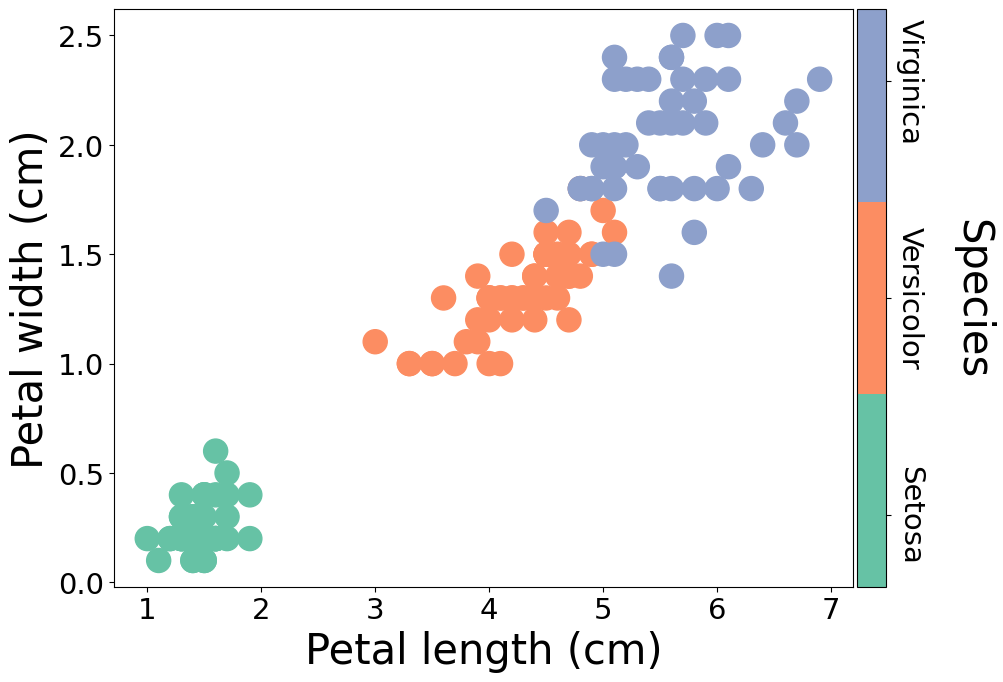

In [12]:
# Now for the petals
plt.figure(figsize=(10., 7.5))

this_cmap = category_cmap
this_cmap = mplcm.get_cmap(this_cmap).colors
this_cmap = ListedColormap(this_cmap[:num_classes])

# plot sepal length and width. Color by class.
plt.scatter(X[:, 2], X[:, 3], c=y, s=ps, marker="o", cmap=this_cmap)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.set_ylabel("Species", rotation=270, fontsize=labels)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.set_yticks([i + 0.25*int(i==0) - 0.25*int(i==num_classes-1) for i in range(num_classes)])
cbar.ax.set_yticklabels([x.capitalize() for x in data["target_names"]], 
                        rotation=-90, fontdict={'verticalalignment': "center"})
cbar.ax.get_yaxis().labelpad = 50

plt.xlabel(data["feature_names"][2].capitalize(), fontsize=labels)
plt.ylabel(data["feature_names"][3].capitalize(), fontsize=labels)

plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

plt.show()

We can see that the data naturally forms clusters, especially in petal space, so the data is very well described by these four features. We probably don't even need all of them to get a good model. One way to check this is to do principal component analysis (PCA), which will find a basis (essentially eigenvectors) that most completely explains the data. You can use this subset as inputs if you want.

## Prepare data for learning

In [13]:
# set for reproducibility
np.random.seed(123)

In [14]:
# save 25% of the data for testing
test_split = 0.25

In [15]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_split)

## Prepare models

We are going to use two simple models to compare performance: a trivial K-nearest neighbors classifier and a more advanced random forest. Neither of these are neural networks.

<h1><center>KNN</center></h1>
<img src="imgs/knn.png" style="height:500px" class="center" alt="knn"/>
<br>
<h1><center>Random Forest</center></h1>
<img src="imgs/random_forest.png" style="height:400px" class="center" alt="rf"/>

In [16]:
# important hyperparameter: how many of the closest neighbors are considered
num_neighbors = 5
knn_model = neighbors.KNeighborsClassifier(n_neighbors=num_neighbors)

In [17]:
# a random forest is essentially an ensemble of decision trees
num_trees = 100
random_forest_model = ensemble.RandomForestClassifier(n_estimators=num_trees)

## Train models

In [18]:
# train KNN
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# train RF
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

## Test

In [20]:
# get predictions from withheld set
knn_pred = knn_model.predict(X_test)

In [21]:
rf_pred = random_forest_model.predict(X_test)

In [22]:
# get accuracy
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)
print(f"KNN has an accuracy of {knn_accuracy:.3}")
print(f"Random forest has an accuracy of {rf_accuracy:.3}")

KNN has an accuracy of 0.974
Random forest has an accuracy of 0.921


In [23]:
# label each prediction as right or wrong (used for colormap of plot)
knn_right = np.array([int(x == knn_pred[i]) for i, x in enumerate(y_test)])
rf_right = np.array([int(x == rf_pred[i]) for i, x in enumerate(y_test)])

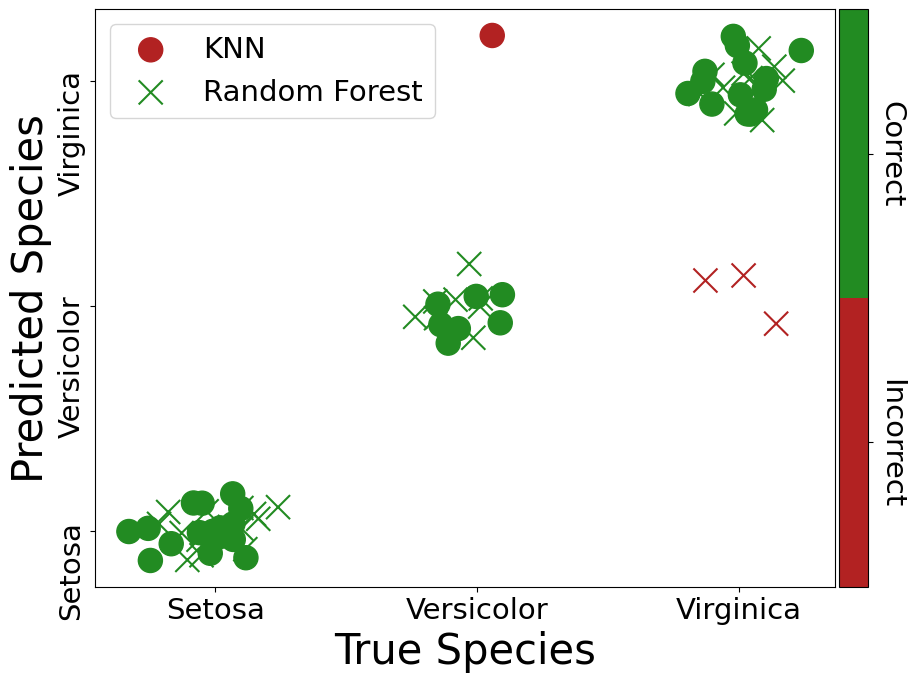

In [24]:
# Plot the results
plt.figure(figsize=(10., 7.5))

this_cmap = ListedColormap(["firebrick", "forestgreen"])

# Plot KNN predictions. Color by class. (random noise is just to stop complete overlap of points)
plt.scatter(y_test + np.random.randn(len(knn_pred))/10, 
            knn_pred + np.random.randn(len(knn_pred))/10, 
            c=knn_right, s=ps, marker="o", 
            cmap=this_cmap, label="KNN")

# plot RF predictions
plt.scatter(y_test + np.random.randn(len(rf_pred))/10, 
            rf_pred + np.random.randn(len(rf_pred))/10, 
            c=rf_right, s=ps, marker="x", 
            cmap=this_cmap, label="Random Forest")

plt.legend(loc="best", fontsize=legends)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.tick_params(labelsize=ticks)
cbar.ax.set_yticks([i + 0.25*int(i==0) - 0.25*int(i!=0) for i in range(2)])
cbar.ax.set_yticklabels(["Incorrect", "Correct"], 
                        rotation=-90, fontdict={'verticalalignment': "center"})
cbar.ax.get_yaxis().labelpad = 40

plt.xlabel("True Species", fontsize=labels)
plt.ylabel("Predicted Species", fontsize=labels)

plt.xticks(np.unique(y_test), 
           labels=[x.capitalize() for x in data["target_names"]], 
           fontsize=ticks)
plt.yticks(np.unique(y_test), 
           labels=[x.capitalize() for x in data["target_names"]], 
           fontsize=ticks, rotation=90)

plt.show()

Confusion matrices are convenient ways to visualize the performance across all classes

In [25]:
knn_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, knn_pred)
rf_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, rf_pred)

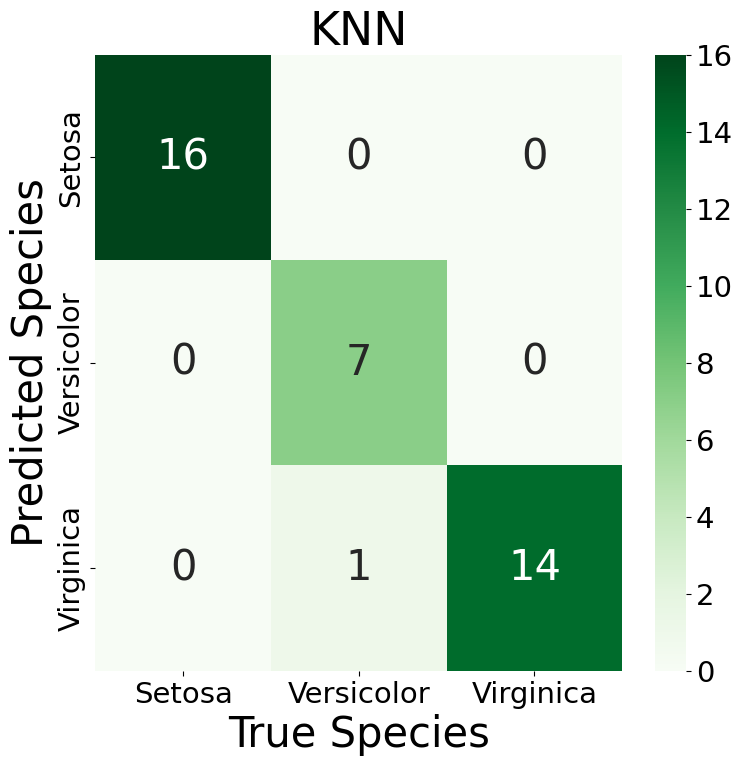

In [64]:
plt.figure(figsize=(8.5, 8.))

ax = sns.heatmap(knn_confusion_matrix.T, annot=True, fmt="d", cmap="Greens")

plt.xlabel("True Species", fontsize=labels)
plt.ylabel("Predicted Species", fontsize=labels)

ax.xaxis.set_ticklabels([x.capitalize() for x in data["target_names"]], fontsize=ticks)
ax.yaxis.set_ticklabels([x.capitalize() for x in data["target_names"]], fontsize=ticks)

plt.title("KNN", fontsize=titles)

plt.show()

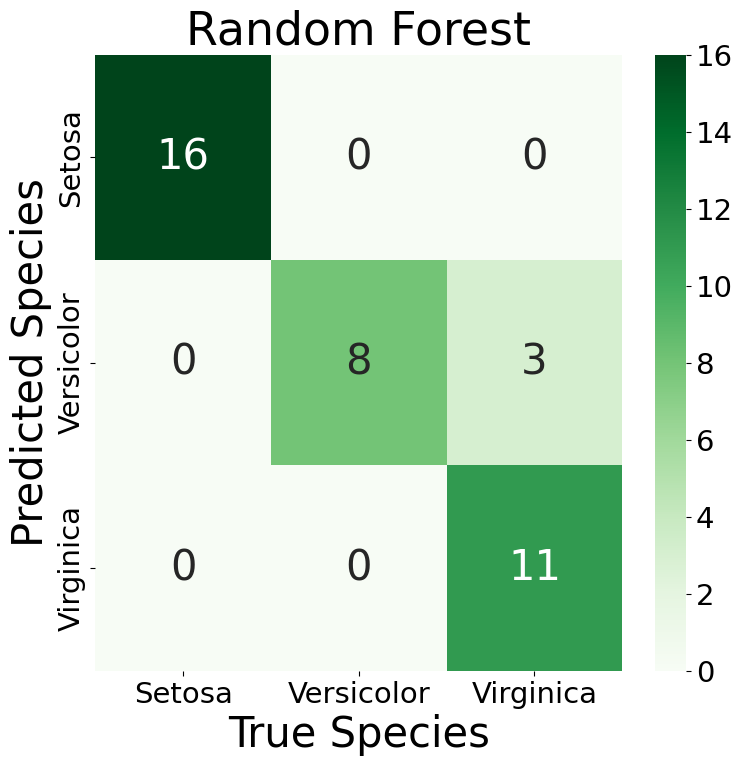

In [65]:
plt.figure(figsize=(8.5, 8.))

ax = sns.heatmap(rf_confusion_matrix.T, annot=True, fmt="d", cmap="Greens")

plt.xlabel("True Species", fontsize=labels)
plt.ylabel("Predicted Species", fontsize=labels)

ax.xaxis.set_ticklabels([x.capitalize() for x in data["target_names"]], fontsize=ticks)
ax.yaxis.set_ticklabels([x.capitalize() for x in data["target_names"]], fontsize=ticks)

plt.title("Random Forest", fontsize=titles)

plt.show()

### Hyperparameter sweep

Let's sweep across some hyperparameters to see if we can improve the performance

In deployment, use [WANDB](https://wandb.ai/home), but that's completely unnecessary here.

I seriously can't sing WANDB's praises enough. For every actual run you ever do, you should use it. It does so much more than hyperparameter sweeps and is incredible for transparancy, reproducibility, and model performance visualization (even during training). Seriously, it rocks.

In [27]:
# choose some range of hyperparameters we care about
# can use more hyperparameters and perform a grid sweep, but we'll stick to just one for each model
possible_ks = [1, 3, 5, 7, 13, 17, 37, 51]
possible_n_trees = [10, 50, 100, 150]

In [28]:
# train a model for each k
knn_accuracies = dict((k, 0) for k in possible_ks)
knn_models = {}
for k in possible_ks:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    knn_models[k] = model
    y_pred = model.predict(X_test)
    # record the accuracy
    knn_accuracies[k] = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy with k = {k} is {knn_accuracies[k]:.3f}")

Accuracy with k = 1 is 0.895
Accuracy with k = 3 is 0.947
Accuracy with k = 5 is 0.974
Accuracy with k = 7 is 0.974
Accuracy with k = 13 is 0.974
Accuracy with k = 17 is 0.974
Accuracy with k = 37 is 0.868
Accuracy with k = 51 is 0.868


In [29]:
# choose the model with the best performance
best_k = max(knn_accuracies, key=knn_accuracies.get)
best_knn_model = knn_models[best_k]

In [30]:
# do the same for the random forest
rf_accuracies = dict((n, 0) for n in possible_n_trees)
rf_models = {}
for n in possible_n_trees:
    model = ensemble.RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    rf_models[n] = model
    y_pred = model.predict(X_test)
    rf_accuracies[n] = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy with n = {n} is {rf_accuracies[n]:.3f}")

Accuracy with n = 10 is 0.895
Accuracy with n = 50 is 0.947
Accuracy with n = 100 is 0.947
Accuracy with n = 150 is 0.921


In [31]:
best_n = max(rf_accuracies, key=rf_accuracies.get)
best_rf_model = rf_models[best_n]

### More metrics

Sometimes you want a more robust measure of performance than simple accuracy. In classification, the receiver operating characteristic (ROC) curve is useful as the area under the curve (AUC) is a better metric than accuracy. It evaluates the model's performance across all possible decision thresholds (i.e. the prediction value that deliminates the classes, which is usually 0.5). A model with a high AUC will be frequently confidently correct. An AUC of $\approx 0.5$ is essentially random guessing: even when it's right, it isn't confident. An AUC of $<0.5$ is even worse than random guessing. The model is consistently confident yet consistently wrong (Dunning-Kruger model).

<img src="imgs/roc.png" style="height:500px" class="center" alt="roc"/><br>

ROC curves are typically used in the context of binary classification. They can be used for multiple classes, but there are some nuances that make them somewhat less informative. Our models don't actually give us the information necessary to make them anyways; you need to get softmax values as outputs. Softmax is a typical activation function at the end of classification in which the outputs are normalized such that the sum is 1. This allows one to interprate the value as the probability/confidence that the input is of that class. These are the results used to create ROC curves. Our simple sklearn models don't do this.

We can still get a _better_ idea of our accuracy than simply looking at all of the data together. This can be done with bootstrapping.

Ideally, but often impractically, you can do this with k-fold cross validation. We could easily do that here (scikit even has it built in), but we aren't going to. It's mostly important that you know about it. The essential idea is that you randomly split your data into k groups and train the same model on each group separately while using the other groups as test data. This gives you a more holistic idea about the performance on new data.

Alternativelty, and much more simple and less time consuming, we can just bootstrap the metrics themselves. This allows us to statistically measure metrics, such as accuracy. For example, I might split my testing data into 100 batches with each batch containing a random selection of 80% of the test data. I evaluate the metrics on each batch. I then have an ensemble of metrics that I can take the mean of, get uncertainties, etc.

In [32]:
bootstrapped_knn_accuracies = []
bootstrapped_rf_accuracies = []
n_bootstraps = 100
bootstrap_frac = 0.8
bootstrap_size = int(bootstrap_frac * len(y_test))

# iterate over random batches
for _ in range(n_bootstraps):

    # randomly select the indices for that batch
    batch_indices = np.random.choice(range(len(y_test)), size=bootstrap_size, replace=False)

    # get the batch data
    x_batch = X_test[batch_indices]
    y_batch = y_test[batch_indices]

    pred = best_knn_model.predict(x_batch)
    bootstrapped_knn_accuracies.append(metrics.accuracy_score(y_batch, pred))

    pred = best_rf_model.predict(x_batch)
    bootstrapped_rf_accuracies.append(metrics.accuracy_score(y_batch, pred))

# get the mean accuracy
bootstrapped_knn_acc = np.mean(bootstrapped_knn_accuracies)
# and the standard deviation of the accuracy distribution
bootstrapped_knn_std = np.std(bootstrapped_knn_accuracies)

bootstrapped_rf_acc = np.mean(bootstrapped_rf_accuracies)
bootstrapped_rf_std = np.std(bootstrapped_rf_accuracies)

print(f"KNN accuracy is {bootstrapped_knn_acc:.3} +/- {bootstrapped_knn_std:.4}")
print(f"Random forest accuracy is {bootstrapped_rf_acc:.3} +/- {bootstrapped_rf_std:.4}")

KNN accuracy is 0.973 +/- 0.01281
Random forest accuracy is 0.946 +/- 0.01693


## Cluster

We can also do unsupervised learning and cluster the data. We can try to recover the classes. There are several different clustering methods, and we will explore several with different pros and cons.

[Some example clustering algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

### K means
Pro: Extremely simple<br>
Con: Need to impose number of classes (we know there are 3)

In [33]:
k = 3

In [34]:
kmean_model = KMeans(n_clusters=k)

In [35]:
kmean_model.fit(X)

/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
kmean_labels = kmean_model.labels_

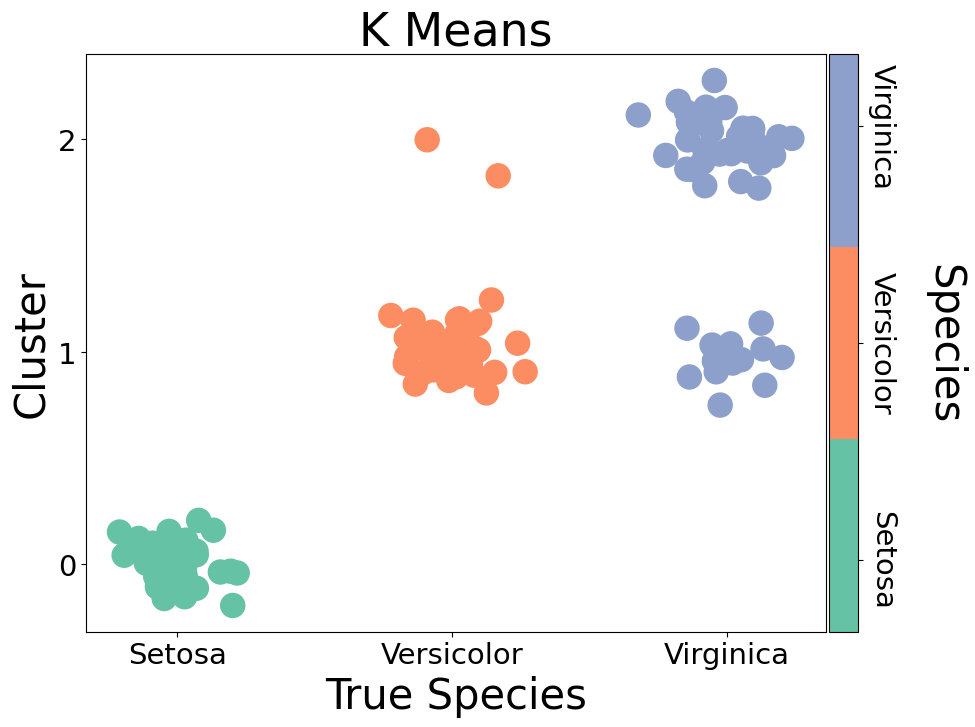

In [37]:
# Now for the petals
plt.figure(figsize=(10., 7.5))

this_cmap = category_cmap
this_cmap = mplcm.get_cmap(this_cmap).colors
this_cmap = ListedColormap(this_cmap[:k])

# plot sepal length and width. Color by class.
plt.scatter(y + np.random.randn(len(y))/10, 
            kmean_labels + np.random.randn(len(y))/10, 
            s=ps, c=y, marker="o", cmap=this_cmap)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.set_ylabel("Species", rotation=270, fontsize=labels)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.set_yticks([i + 0.25*int(i==0) - 0.25*int(i==num_classes-1) for i in range(num_classes)])
cbar.ax.set_yticklabels([x.capitalize() for x in data["target_names"]], 
                        rotation=-90, fontdict={'verticalalignment': "center"})
cbar.ax.get_yaxis().labelpad = 50

plt.xlabel("True Species", fontsize=labels)
plt.ylabel("Cluster", fontsize=labels)

plt.xticks(np.unique(y_test), 
           labels=[x.capitalize() for x in data["target_names"]], 
           fontsize=ticks)
plt.yticks(np.unique(y_test), 
           labels=[i for i in range(k)], 
           fontsize=ticks, rotation=0)

plt.title("K Means", fontsize=titles)

plt.show()

### OPTICS

Pro: don't enforce number of clusters<br>
Con: very sensitive to hyperparameters

In [38]:
min_samples = 11
opt_cluster = OPTICS(min_samples=min_samples).fit(X)

In [39]:
optics_labels = opt_cluster.labels_
n_opt_classes = len(np.unique(optics_labels))

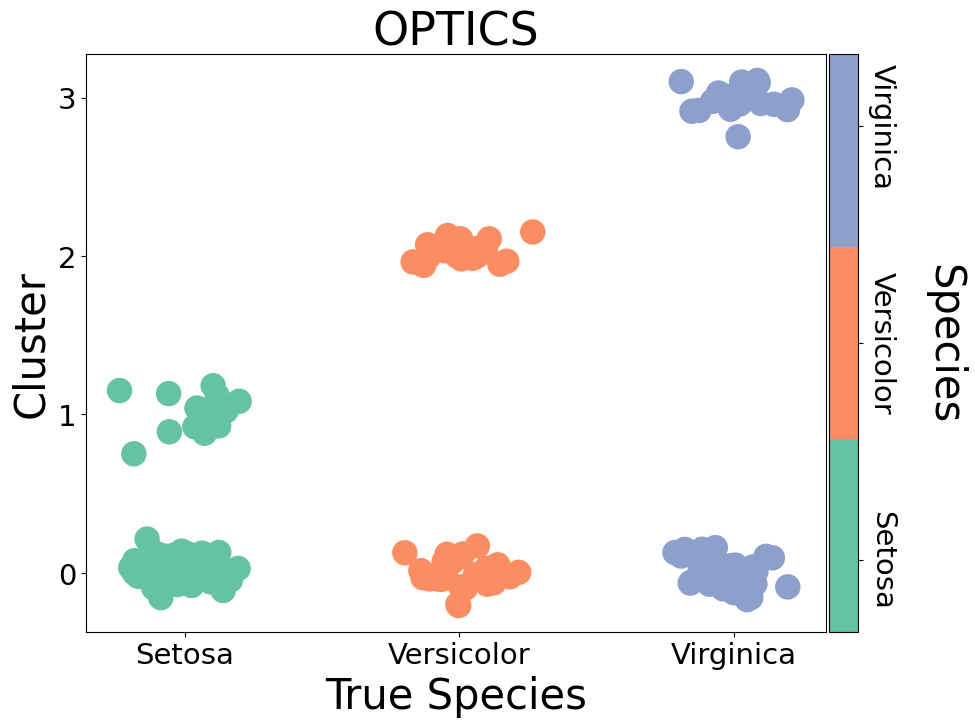

In [40]:
# Now for the petals
plt.figure(figsize=(10., 7.5))

this_cmap = category_cmap
this_cmap = mplcm.get_cmap(this_cmap).colors
this_cmap = ListedColormap(this_cmap[:num_classes])

# plot sepal length and width. Color by class.
plt.scatter(y + np.random.randn(len(y))/10, 
            optics_labels + np.random.randn(len(y))/10, 
            s=ps, c=y, marker="o", cmap=this_cmap)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.set_ylabel("Species", rotation=270, fontsize=labels)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.set_yticks([i + 0.25*int(i==0) - 0.25*int(i==num_classes-1) for i in range(num_classes)])
cbar.ax.set_yticklabels([x.capitalize() for x in data["target_names"]], 
                        rotation=-90, fontdict={'verticalalignment': "center"})
cbar.ax.get_yaxis().labelpad = 50

plt.xlabel("True Species", fontsize=labels)
plt.ylabel("Cluster", fontsize=labels)

plt.xticks(np.unique(y_test), 
           labels=[x.capitalize() for x in data["target_names"]], 
           fontsize=ticks)
plt.yticks(np.unique(optics_labels), 
           labels=[i for i in range(n_opt_classes)], 
           fontsize=ticks, rotation=0)

plt.title("OPTICS", fontsize=titles)

plt.show()

# Regression

Let's do a trivial regression problem just to show the process. We'll define a function, $f$, that maps an input vector, $\vec{x}$, to an output (single real number for now), $y$. Our goal is to estimate $f$ with $\hat{f}$ and predict $\hat{y}$ such that $y = f(\vec{x}) \approx \hat{f}(\vec{x}) = \hat{y}$.

In [41]:
def regression_function(x1: float, x2: float):
    """Right now, we're just using a trivial 2 variable function"""

    return np.sin(x1) + np.exp(-x2)

In [42]:
# set up our domain
n_points = 1000
min_x1, max_x1 = -np.pi, np.pi
min_x2, max_x2 = 0., 10.

np.random.seed(123)

# randomly sample some coordinates
x1 = np.random.uniform(low=min_x1, high=max_x1, size=n_points)
x2 = np.random.uniform(low=min_x2, high=max_x2, size=n_points)

# assign coordinates to a matrix
X_regress = np.empty((n_points, 2))
X_regress [:, 0] = x1
X_regress [:, 1] = x2

# get the outputs
y_regress = regression_function(x1, x2)

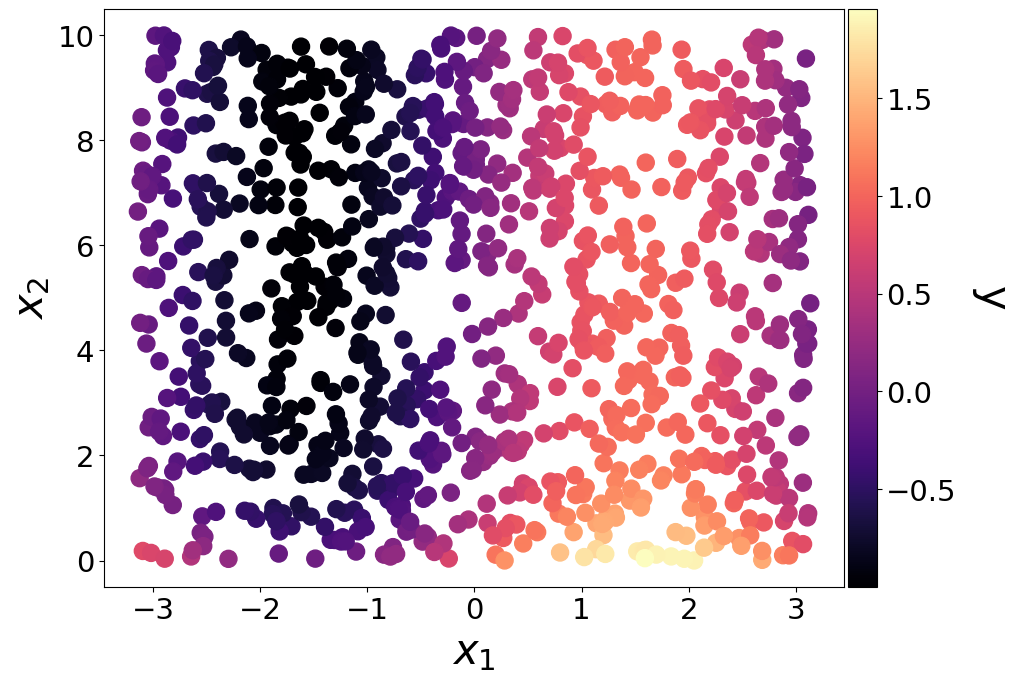

In [43]:
# Plot some example data
plt.figure(figsize=(10., 7.5))
plt.scatter(X_regress[:, 0], X_regress[:, 1], c=y_regress, s=ps/2, marker="o", cmap=cmap)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.set_ylabel("y", rotation=270, fontsize=labels)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 40

plt.xlabel(r"$x_{1}$", fontsize=labels)
plt.ylabel(r"$x_{2}$", fontsize=labels)

plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

plt.show()

In [44]:
# use a simple KNN regression model
k = 5
regression_model = neighbors.KNeighborsRegressor(n_neighbors=k)

In [45]:
X_train_regress, X_test_regress, y_train_regress, y_test_regress = model_selection.train_test_split(X_regress, 
                                                                                                    y_regress, 
                                                                                                    test_size=test_split)

In [46]:
regression_model.fit(X_train_regress, y_train_regress)

KNeighborsRegressor()

In [47]:
y_pred_regress = regression_model.predict(X_test_regress)

In [48]:
error_array = y_pred_regress - y_test_regress
mse_array = (error_array) ** 2
mse = np.mean(mse_array)
print(f"Regression MSE = {mse:.3}")

Regression MSE = 0.00541


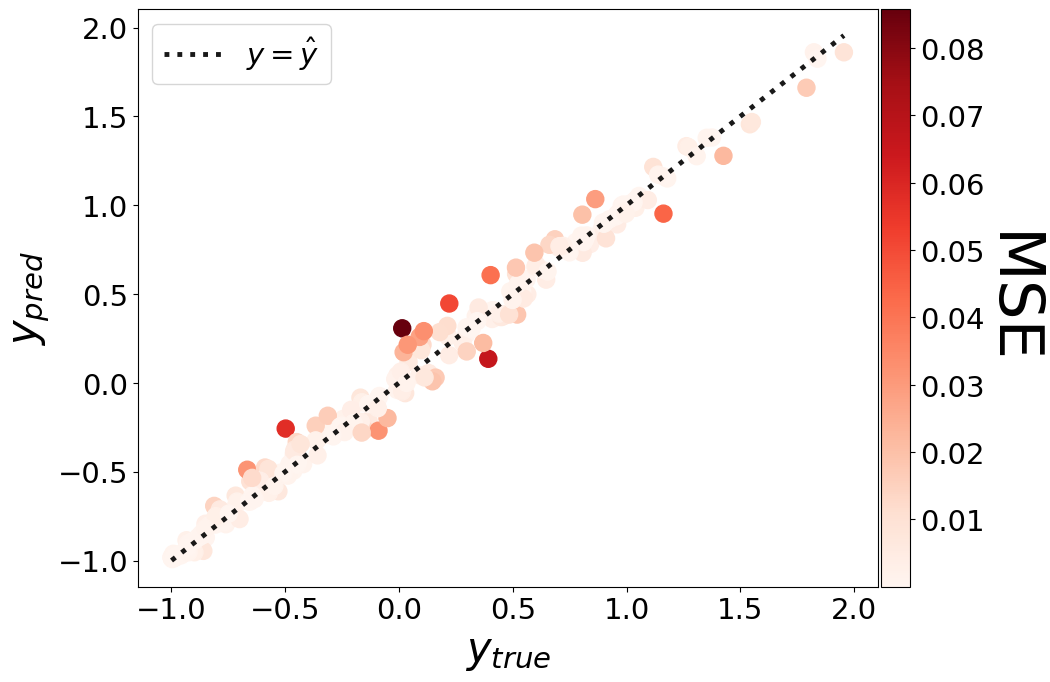

In [49]:
plt.figure(figsize=(10., 7.5))

y_test_linspace = np.linspace(np.min(y_test_regress), np.max(y_test_regress), 100)

# plot the true vs predicted values. Should fall on same line.
plt.scatter(y_test_regress, y_pred_regress, c=mse_array, s=ps/2, marker="o", cmap="Reds")
plt.plot(y_test_linspace, y_test_linspace, lw=lw-1, c="k", alpha=0.9, ls=":", label=r"$y = \hat{y}$")

plt.legend(loc="upper left", fontsize=legends)

cbar = plt.colorbar(fraction=0.04065, pad=0.005)

cbar.ax.set_ylabel("MSE", rotation=270, fontsize=1.5*labels, labelpad=0.05)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 40

plt.xlabel(r"$y_{true}$", fontsize=labels)
plt.ylabel(r"$y_{pred}$", fontsize=labels)

plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

plt.show()

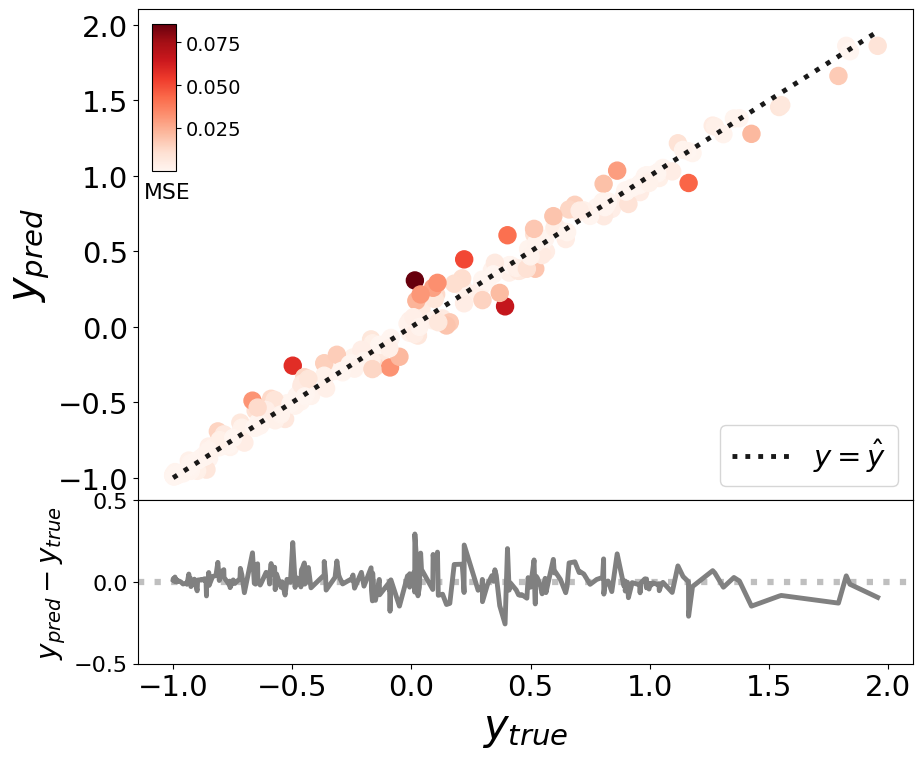

In [50]:
# Plot results and errors
mplrc('font',  **{'size':labels})
mplrc('xtick', labelsize=ticks) 
mplrc('ytick', labelsize=ticks) 
mplrc('legend', fontsize=legends)

fig, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10., 8.5))

# plot the truth vs predictions
scat = ax.scatter(y_test_regress, y_pred_regress, c=mse_array, s=ps/2, marker="o", cmap="Reds")
# plot correct line
ax.plot(y_test_linspace, y_test_linspace, lw=lw-1, c="k", alpha=0.9, ls=":", label=r"$y = \hat{y}$")

ax.legend(loc="lower right", fontsize=legends)

# make an inset for the colorbar
cbaxes = inset_axes(ax, width="3%", height="30%", loc="upper left") 
cbar = plt.colorbar(mappable=scat, cax=cbaxes, orientation="vertical")
cbar.ax.set_ylabel("MSE", rotation=0, 
                   fontsize=0.75*ticks, 
                   y=-0.075,
                   ha="left",
                  )
cbar.ax.tick_params(labelsize=0.67*ticks)
cbar.ax.get_yaxis().labelpad = -70

# plot the errors (sort y_test so that plotting looks right - could just scatter without sorting)
order = np.argsort(y_test_regress)
ax2.plot(y_test_regress[order], error_array[order], 
         lw=lw-1,
         c='gray', 
        )

ax2.axhline(y=0, 
            c='gray', lw=lw, ls=':', alpha=0.5)

# set the tick parameters
ax2.yaxis.set_tick_params(labelsize=ticks-5)
ax2.set_ylim(-0.5, 0.5)

# set the labels
ax.set_xlabel(r"$y_{true}$", fontsize=labels)
ax.set_ylabel(r"$y_{pred}$", fontsize=labels)
ax2.set_xlabel(r"$y_{true}$", fontsize=labels)
ax2.set_ylabel(r"$y_{pred} - y_{true}$", fontsize=labels-10)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# Next week: neural networks